In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
lst_class = Base.classes.keys()
lst_class

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# get table and colum names
inspector = inspect(engine)
for table_name in inspector.get_table_names():
    print("Table name: %s" % table_name)
    for column in inspector.get_columns(table_name):
        print("Column: %s" % column)

Table name: measurement
Column: {'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
Column: {'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
Column: {'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
Column: {'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
Column: {'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
Table name: station
Column: {'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
Column: {'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
Column: {'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_k

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

In [12]:
# get the date range
end_date = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date == func.max(Measurement.date).select()).first()[0]
begin_date = (dt.datetime.strptime(end_date, '%Y-%m-%d') - dt.timedelta(days=365)).strftime('%Y-%m-%d')

In [13]:
# retrieve data the last 12 months of precipitation data 
results = session.query(Measurement.date, func.round(func.sum(Measurement.prcp),2))\
    .filter(Measurement.date >= begin_date).filter(Measurement.date < end_date).all()
dates = [result[0] for result in results[:]]
precips = [result[1] for result in results[:]]
precips_max = round(max(precips), 0) + 1

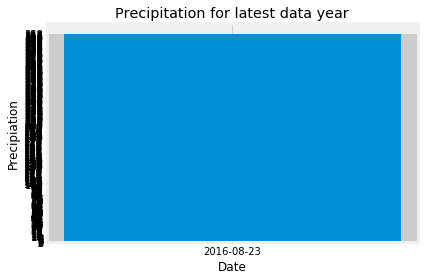

In [14]:
# plot the results
fig, ax = plt.subplots()
y_pos = np.arange(precips_max)
ax.bar(dates, precips)

ax.set_xlabel("Date")
ax.set_ylabel("Precipiation")
ax.set_yticks(y_pos)
ax.set_title("Precipitation for latest data year")
fig.tight_layout()
plt.show()
fig.savefig("Images/Precip_for_latest_year.png", dpi=300)


In [15]:
# retrieve data the last 12 months of precipitation data 
results_gb = session.query(Measurement.date, func.round(func.sum(Measurement.prcp),2))\
    .filter(Measurement.date >= begin_date).filter(Measurement.date < end_date).group_by(Measurement.date).all()
dates_gb = [result[0] for result in results_gb[:]]
precips_gb = [result[1] for result in results_gb[:]]
precips_max_gb = round(max(precips_gb), 0) + 1

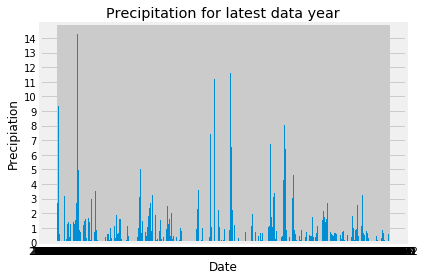

In [16]:
# plot the results
fig_gb, ax_gb = plt.subplots()
y_pos_gb = np.arange(precips_max_gb)
ax_gb.bar(dates_gb, precips_gb)

ax_gb.set_xlabel("Date")
ax_gb.set_ylabel("Precipiation")
ax_gb.set_yticks(y_pos_gb)
ax_gb.set_title("Precipitation for latest data year")
fig_gb.tight_layout()
plt.show()
fig_gb.savefig("Images/Precip_for_latest_year_grpby_date.png", dpi=300)

In [17]:

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [19]:
# Design a query to show how many stations are available in this dataset?


In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [22]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [23]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [24]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [25]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [26]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [27]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [28]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [29]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [30]:
# Plot the daily normals as an area plot with `stacked=False`
